# Note: Solving Systems of Linear Equations (Matrix Equations)


# Dot prodcut

If we have two vectors (1d array) with the same length: 
$a = [a_1, a_2, \dots a_n]$,
$b = [b_1, b_2, \dots b_n]$

we can define the dot product between these two vectors: $a\cdot b = \sum_{i=1}^{n} a_i b_i$

# Matrix vector multiplication

Let 

$$
A = \begin{bmatrix}
  a_{11} & a_{12} & \dots &a_{1n} \\
  a_{21} & a_{22} & \dots &a_{2n} \\
  \vdots & \vdots & \dots &\vdots \\
  a_{n1} & a_{n2} & \dots &a_{nn} \\
\end{bmatrix}
,\quad
x = 
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  \vdots \\
  x_{n} \\
\end{bmatrix}
$$

$a_{ij}$ is the element at the i-th row and j-th column of A.

Define the matrix-vector multiplication

$$\begin{aligned}
A x =
\begin{bmatrix}
  a_{11} & a_{12} & \dots &a_{1n} \\
  a_{21} & a_{22} & \dots &a_{2n} \\
  \vdots & \vdots & \dots &\vdots \\
  a_{n1} & a_{n2} & \dots &a_{nn} \\
\end{bmatrix}
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  \vdots \\
  x_{n} \\
\end{bmatrix}
 = 
\begin{bmatrix}
  a_{11} x_1 +  a_{12} x_2 \dots a_{1n} x_n \\
  a_{21} x_1 +  a_{22} x_2 \dots a_{2n} x_n \\
  \vdots \\
  a_{n1} x_1 +  a_{n2} x_2 \dots a_{nn} x_n \\
\end{bmatrix}\\
\end{aligned}$$

Essentially, we take each row of A (a 1d array of n elements) and compute its dot product with $x$ (also a 1d array of n elements)

# Systems of linear equations
Here is a system of n linear equations with n unknowns $[x_1, x_2, \dots x_n]$ 

$$\begin{cases}
  a_{11} x_1 +  a_{12} x_2 \dots a_{1n} x_n = y_1 \\
  a_{21} x_1 +  a_{22} x_2 \dots a_{2n} x_n = y_2 \\
  \vdots \\
  a_{n1} x_1 +  a_{n2} x_2 \dots a_{nn} x_n = y_n \\
\end{cases}  $$

We can write it as matrix equation $Ax = b$
where 

$$A = \begin{bmatrix}
  a_{11} & a_{12} & \dots &a_{1n} \\
  a_{21} & a_{22} & \dots &a_{2n} \\
  \vdots & \vdots & \dots &\vdots \\
  a_{n1} & a_{n2} & \dots &a_{nn} \\
\end{bmatrix}
,\quad
x = 
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  \vdots \\
  x_{n} \\
\end{bmatrix}
,\quad
b = 
\begin{bmatrix}
  y_{1} \\
  y_{2} \\
  \vdots \\
  y_{n} \\
\end{bmatrix}$$

The matrix A and the vector b are known. The vectors $x$ is unknown. Solving the matrix equation means finding $x$ such that $Ax=b$


# Example
To solve the following system of equations
$$\begin{cases}
 x_1  + x_2  +  x_3 =  6\\
2x_1 +  x_2  + 2x_3 = 10\\
3x_1 + 2x_2 +   x_3 = 10\\
\end{cases}$$

We can write it as a matrix equation $Ax = b$


$$
A = 
\begin{bmatrix}
  1& 1 & 1 \\
  2& 1 & 2 \\
  3& 2 & 1 \\
\end{bmatrix}  
,\quad
x = \begin{bmatrix}
  x_1\\
  x_2\\
  x_3\\
\end{bmatrix}  
,\quad
b = 
\begin{bmatrix}
  6\\
  10\\
  10\\
\end{bmatrix}  
$$

# Solve the matrix equation

In matlab, we solve the equation by `x = A\b`. In python, use np.linalg.solve

Note: Mathematically, we usually think of x and b as column vectors. In Matlab `x = A\b`, b and x should be column vector. In `x=numpy.linalg.solve(A,b)`, b can be row or column vector, and the shape of the returned x is identical to b.


In [1]:
import numpy as np

# solve 
# x  + y  +  z = 6
# 2x + y  + 2z = 10
# 3x + 2y +  z = 10

A = np.array([[1,1,1],[2,1,2],[3,2,1]])
b = np.array([[6],[10],[10]])

x = np.linalg.solve(A,b)
print(x)            

[[1.]
 [2.]
 [3.]]


Verify our solution by computing Ax and see if Ax = b

In [2]:
# compute Ax
A@x 

array([[ 6.],
       [10.],
       [10.]])

In [3]:
#  also compute Ax
A.dot(x)

array([[ 6.],
       [10.],
       [10.]])

# Application: polynomial interpolation

**Note: here the indices of $(x_i,y_i)$ start at i=0, so that the indexing is similar to numpy arrays.

Goal: Given data points $(x_0, y_0)$ $(x_1, y_1)$, ... , $(x_n, y_n)$. Find the polynomial that passes through all the data points.

For example, on the x-y plane, if we have two points, $(1,1)$, $(2,3)$. Then $p(x) = 2x-1$ is the unique straight line that passes these two points.

If we have three points, $(0,0)$, $(1/2,1/4)$,$(1,0)$. Then $p(x) = x^2-x$ is the unique quadratic polynomial that passes these three points.

We can see the pattern: to determine a polynomial of degree  $ n$, we need $n+1$ points from it.

We know that a polynomial of degree n, denoted as $p_n(x)$, has this general form

$$p_n(x) = a_0 + a_1 x + a_2 x^2 + \dots a_n x^n $$

Now the question becomes: given $n+1$ data points $(x_0, y_0)$, $(x_1, y_1)$, ... , $(x_n, y_n)$. Find the $n+1$ coefficients $a_0$, $a_1$, ..., $a_{n}$

By plugging in the points $(x_0, y_0)$, $(x_1, y_1)$, ... , $(x_n, y_n)$ to the generic form $p_n(x)$, we get $n+1 $ equations:

$$
\begin{cases}
  a_{0} + a_{1} x_1 + a_{2} x_1^2 + \dots a_{n} x_1^n = y_1 \\
  a_{0} + a_{1} x_2 + a_{2} x_2^2 + \dots a_{n} x_2^n = y_2 \\
  \vdots\\
  a_{0} + a_{1} x_n + a_{2} x_n^2 + \dots a_{n} x_n^n = y_n \\
\end{cases}  
$$

In matrix form, we have Ax = b
where


$$A = \begin{bmatrix}
  1 & x_0 & x_0^2 & \dots &x_0^n \\
  1 & x_1 & x_1^2 & \dots &x_1^n \\
  1 & x_2 & x_2^2 & \dots &x_2^n \\
  \vdots &\vdots & \vdots & \ddots &\vdots \\
  1 & x_n & x_n^2 & \dots &x_n^n \\
\end{bmatrix}
,\quad
x = 
\begin{bmatrix}
  a_{0} \\
  a_{1} \\
  a_{2} \\
  \vdots \\
  a_{n} \\
\end{bmatrix}
,\quad
b = 
\begin{bmatrix}
  y_{0} \\
  y_{1} \\
  y_{2} \\
  \vdots \\
  y_{n} \\
\end{bmatrix}
$$

Solve this matrix equation to get x, which includes all the coefficients of the polynomial.

$A$ is called the Vandermonde matrix.



# Example

Q: what is the cubic polynomial that passes (0,-4), (1,-2), (2,2), (3,14)?




In [4]:
def vandermonde(x):
    n = len(x)
    V = np.zeros(shape = (n,n))
    for i in range(n):
        for j in range(n):
            V[i,j] = x[i]**(j)
    return V

In [5]:
x = np.array([0,1,2,3])
y = np.array([-4,-2,2,14])
# A = np.vander(x,increasing=True) # numpy has a function for the Vandermonde matrix
A = vandermonde(x)
a = np.linalg.solve(A,y)

print(A)
print(a)

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]
[-4.  3. -2.  1.]


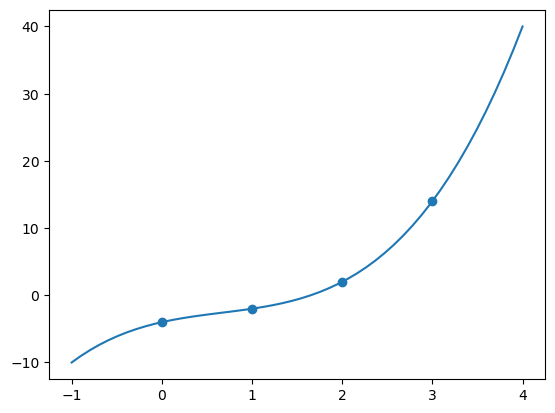

In [6]:
# plot the data points and the interpolating polynomial
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# plot data points
ax.scatter(x,y)

# reconstructed polynomial
cubic = lambda x: a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

# plot polynomial
xx = np.linspace(-1,4)
yy = cubic(xx)
ax.plot(xx,yy)